#Introduction:

You are working for a large e-commerce store that sells products online. The company has collected data on customer purchases and wants to gain insights into customer preferences and find who their loyal customers and what are their attributes are. Additionally, the company wants to create a model to forecast customer purchases


#Objective: Perform EDA on the provided dataset to gain insights into customer behavior.

Importing Libraries

In [217]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
import datetime as dt
import colorlover as cl
import plotly.express as px
import geopandas as gpd
import math
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
import folium
from folium.plugins import FastMarkerCluster
from prophet import Prophet
import spacy
import string
import random
import re

In [218]:
#importing libraries for ML
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import r2_score,accuracy_score,classification_report
# Splitting data into training/testing
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

# Importing libraries for building the neural network
from keras.models import Sequential
from keras.layers import Dense,LSTM
from keras.wrappers.scikit_learn import KerasClassifier,KerasRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split

import xgboost as xgb


In [219]:
warnings.simplefilter(action='ignore')

In [220]:
# Mouting the drive from Google
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Reading the files by using pandas dataframe

In [221]:
customers = pd.read_csv("/content/drive/MyDrive/unzip/olist_customers_dataset.csv")

In [222]:
reviews = pd.read_csv("/content/drive/MyDrive/unzip/olist_order_reviews_dataset.csv")

In [223]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [224]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [225]:
orders = pd.read_csv("/content/drive/MyDrive/unzip/olist_orders_dataset.csv")

In [226]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [227]:
payments = pd.read_csv("/content/drive/MyDrive/unzip/olist_order_payments_dataset.csv")

In [228]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [229]:
products=  pd.read_csv("/content/drive/MyDrive/unzip/olist_products_dataset.csv")

In [230]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [231]:
sellers= pd.read_csv("/content/drive/MyDrive/unzip/olist_sellers_dataset.csv")

In [232]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [233]:
items= pd.read_csv("/content/drive/MyDrive/unzip/olist_order_items_dataset.csv")

In [234]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [235]:
translation = pd.read_csv("/content/drive/MyDrive/unzip/product_category_name_translation.csv")

In [236]:
translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


#Exploratory Data Analysis (EDA)


In [237]:
customers['customer_city'].value_counts()

sao paulo            15540
rio de janeiro        6882
belo horizonte        2773
brasilia              2131
curitiba              1521
                     ...  
bequimao                 1
andarai                  1
vargem grande            1
curvelandia              1
eugenio de castro        1
Name: customer_city, Length: 4119, dtype: int64

In [238]:
customers.shape

(99441, 5)

In [239]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [240]:
customers.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [241]:
#checking for the nan values
customers.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

No nan values found

In [242]:
customers['customer_id'].unique

<bound method Series.unique of 0        06b8999e2fba1a1fbc88172c00ba8bc7
1        18955e83d337fd6b2def6b18a428ac77
2        4e7b3e00288586ebd08712fdd0374a03
3        b2b6027bc5c5109e529d4dc6358b12c3
4        4f2d8ab171c80ec8364f7c12e35b23ad
                       ...               
99436    17ddf5dd5d51696bb3d7c6291687be6f
99437    e7b71a9017aa05c9a7fd292d714858e8
99438    5e28dfe12db7fb50a4b2f691faecea5e
99439    56b18e2166679b8a959d72dd06da27f9
99440    274fa6071e5e17fe303b9748641082c8
Name: customer_id, Length: 99441, dtype: object>

In [243]:
print("total orders: ", len(orders))
print("total unique orders: ", orders.order_id.nunique())

total orders:  99441
total unique orders:  99441


In [244]:
#Created a function to check all the data
#defining a datainfoAll
def datainfoAll(df):
   print(f"Dataset Shape: {df.shape}")
   print("-"*125)
   summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
   summary = summary.reset_index()
   summary['Name'] = summary['index']
   summary = summary[['Name','dtypes']]
   summary['Missing'] = df.isnull().sum().values
   summary['Uniques'] = df.nunique().values
   summary['First Value'] = df.iloc[0].values
   summary['Second Value'] = df.iloc[1].values
   return summary

In [245]:
#customers
datainfoAll(customers)

Dataset Shape: (99441, 5)
-----------------------------------------------------------------------------------------------------------------------------


,Name,dtypes,Missing,Uniques,First Value,Second Value
0,customer_id,object,0,99441,06b8999e2fba1a1fbc88172c00ba8bc7,18955e83d337fd6b2def6b18a428ac77
1,customer_unique_id,object,0,96096,861eff4711a542e4b93843c6dd7febb0,290c77bc529b7ac935b93aa66c333dc3
2,customer_zip_code_prefix,int64,0,14994,14409,9790
3,customer_city,object,0,4119,franca,sao bernardo do campo
4,customer_state,object,0,27,SP,SP


In [246]:
#Reviews
datainfoAll(reviews)

Dataset Shape: (99224, 7)
-----------------------------------------------------------------------------------------------------------------------------


,Name,dtypes,Missing,Uniques,First Value,Second Value
0,review_id,object,0,98410,7bc2406110b926393aa56f80a40eba40,80e641a11e56f04c1ad469d5645fdfde
1,order_id,object,0,98673,73fc7af87114b39712e6da79b0a377eb,a548910a1c6147796b98fdf73dbeba33
2,review_score,int64,0,5,4,5
3,review_comment_title,object,87656,4527,NaN,NaN
4,review_comment_message,object,58247,36159,NaN,NaN
5,review_creation_date,object,0,636,2018-01-18 00:00:00,2018-03-10 00:00:00
6,review_answer_timestamp,object,0,98248,2018-01-18 21:46:59,2018-03-11 03:05:13


In [247]:
#payments
datainfoAll(payments)

Dataset Shape: (103886, 5)
-----------------------------------------------------------------------------------------------------------------------------


,Name,dtypes,Missing,Uniques,First Value,Second Value
0,order_id,object,0,99440,b81ef226f3fe1789b1e8b2acac839d17,a9810da82917af2d9aefd1278f1dcfa0
1,payment_sequential,int64,0,29,1,1
2,payment_type,object,0,5,credit_card,credit_card
3,payment_installments,int64,0,24,8,1
4,payment_value,float64,0,29077,99.33,24.39


In [248]:
#products
datainfoAll(products)

Dataset Shape: (32951, 9)
-----------------------------------------------------------------------------------------------------------------------------


,Name,dtypes,Missing,Uniques,First Value,Second Value
0,product_id,object,0,32951,1e9e8ef04dbcff4541ed26657ea517e5,3aa071139cb16b67ca9e5dea641aaa2f
1,product_category_name,object,610,73,perfumaria,artes
2,product_name_lenght,float64,610,66,40.0,44.0
3,product_description_lenght,float64,610,2960,287.0,276.0
4,product_photos_qty,float64,610,19,1.0,1.0
5,product_weight_g,float64,2,2204,225.0,1000.0
6,product_length_cm,float64,2,99,16.0,30.0
7,product_height_cm,float64,2,102,10.0,18.0
8,product_width_cm,float64,2,95,14.0,20.0


In [249]:
#items
datainfoAll(items)

Dataset Shape: (112650, 7)
-----------------------------------------------------------------------------------------------------------------------------


,Name,dtypes,Missing,Uniques,First Value,Second Value
0,order_id,object,0,98666,00010242fe8c5a6d1ba2dd792cb16214,00018f77f2f0320c557190d7a144bdd3
1,order_item_id,int64,0,21,1,1
2,product_id,object,0,32951,4244733e06e7ecb4970a6e2683c13e61,e5f2d52b802189ee658865ca93d83a8f
3,seller_id,object,0,3095,48436dade18ac8b2bce089ec2a041202,dd7ddc04e1b6c2c614352b383efe2d36
4,shipping_limit_date,object,0,93318,2017-09-19 09:45:35,2017-05-03 11:05:13
5,price,float64,0,5968,58.9,239.9
6,freight_value,float64,0,6999,13.29,19.93


In [250]:
#sellers
datainfoAll(sellers)

Dataset Shape: (3095, 4)
-----------------------------------------------------------------------------------------------------------------------------


,Name,dtypes,Missing,Uniques,First Value,Second Value
0,seller_id,object,0,3095,3442f8959a84dea7ee197c632cb2df15,d1b65fc7debc3361ea86b5f14c68d2e2
1,seller_zip_code_prefix,int64,0,2246,13023,13844
2,seller_city,object,0,611,campinas,mogi guacu
3,seller_state,object,0,23,SP,SP


In [251]:
#Translation
datainfoAll(translation)

Dataset Shape: (71, 2)
-----------------------------------------------------------------------------------------------------------------------------


,Name,dtypes,Missing,Uniques,First Value,Second Value
0,product_category_name,object,0,71,beleza_saude,informatica_acessorios
1,product_category_name_english,object,0,71,health_beauty,computers_accessories


#Making a Single DataFrame by merging all the above dataframe by using joins

In [252]:
#making final dataframe with all columns
orders_1 = pd.merge(orders, items, on='order_id',how='left')
orders_2=pd.merge(orders_1, products, on='product_id',how='left')
orders_3= pd.merge(orders_2, payments, on='order_id',how='left')
orders_4= pd.merge(orders_3, sellers, on='seller_id',how='left')
orders_5= pd.merge(orders_4, reviews, on='order_id',how='left')
orders_6= pd.merge(orders_5, customers, on='customer_id',how='left')
df=  pd.merge(orders_6,translation , on='product_category_name',how='left')

Analysing the channel payments

In [253]:
payments['payment_type'].value_counts().to_frame().reset_index()

,index,payment_type
0,credit_card,76795
1,boleto,19784
2,voucher,5775
3,debit_card,1529
4,not_defined,3


Highest payments have been done by the credit cards

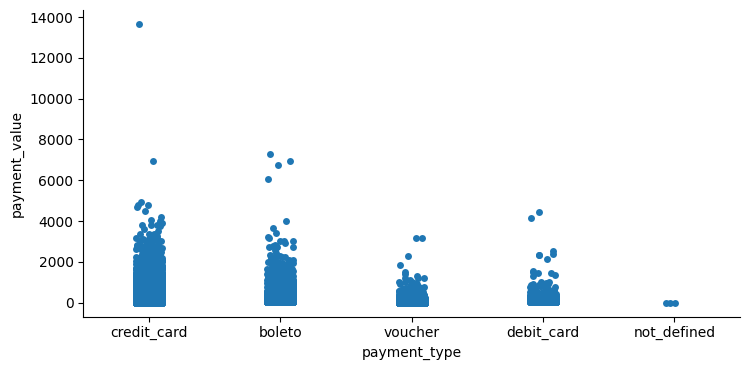

In [254]:
ax = sns.catplot(x="payment_type", y="payment_value",data=payments, aspect=2, height=3.8)

In fact, we can see by the catplot that payments made by credit card really took marjority place on brazilian e-commerce. Besides that, since 201803 it's possible to see a little decrease on this type of payment. By the other side, payments made by debit card is showing a growing trend since 201805, wich is a good opportunity for investor to improve services for payments like this.


In [255]:
#Looking for the payment installment
payments.groupby('payment_type')['payment_installments'].value_counts()

payment_type  payment_installments
boleto        1                       19784
credit_card   1                       25455
              2                       12413
              3                       10461
              4                        7098
              10                       5328
              5                        5239
              8                        4268
              6                        3920
              7                        1626
              9                         644
              12                        133
              15                         74
              18                         27
              11                         23
              24                         18
              20                         17
              13                         16
              14                         15
              17                          8
              16                          5
              21                         

Only credit cards allow installments(i.e greater than 1)

In [256]:
#written code to plot the graphs by using the def functions such as count plot and bar plot

In [257]:
def count_plot(x, df, title, xlabel, ylabel, width, height, order = None, rotation=False, palette='winter', hue=None):
    ncount = len(df)
    plt.figure(figsize=(width,height))
    ax = sns.countplot(x = x, palette=palette, order = order, hue=hue)
    plt.title(title, fontsize=20)
    if rotation:
        plt.xticks(rotation = 'vertical')
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel(ylabel, fontsize=15)

    ax.yaxis.set_label_position('left')
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y),
                ha='center', va='bottom') # set the alignment of the text

    plt.show()

def bar_plot(x, y, df, title, xlabel, ylabel, width, height, order = None, rotation=False, palette='winter', hue=None):
    ncount = len(df)
    plt.figure(figsize=(width,height))
    ax = sns.barplot(x = x, y=y, palette=palette, order = order, hue=hue)
    plt.title(title, fontsize=20)
    if rotation:
        plt.xticks(rotation = 'vertical')
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel(ylabel, fontsize=15)

    ax.yaxis.set_label_position('left')
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y),
                ha='center', va='bottom') # set the alignment of the text

    plt.show()

In [258]:
orders.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

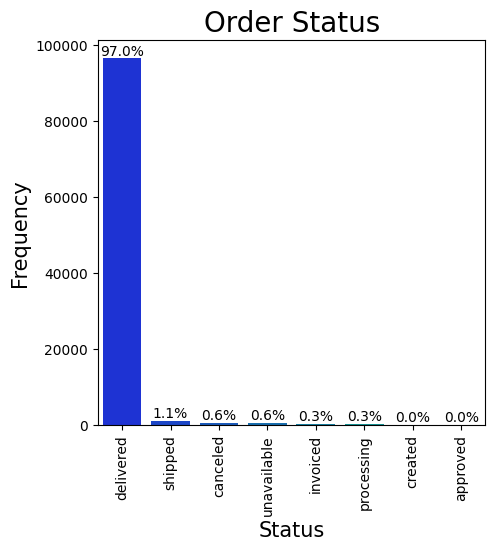

In [259]:
x = orders['order_status']
order = orders['order_status'].value_counts().index
count_plot(x, orders, "Order Status", "Status", 'Frequency', 5, 5, order =order, rotation=True)

we can see that 97% of orders has been delivered on time

#Convert the datatype of all the time columns to datetime

In [260]:
orders['orders_delivered_carrier_date'] = pd.to_datetime(orders.order_delivered_carrier_date)
orders['order_estimated_delivery_date'] = pd.to_datetime(orders.order_delivered_customer_date)
orders['order_delivered_carrier_date'] = pd.to_datetime(orders.order_delivered_carrier_date)
orders['order_purchase_timestamp'] = pd.to_datetime(orders.order_delivered_carrier_date)

#Combining the two dataset orders and customers  by inner join to get the hidden patterns

In [261]:
#Merging the customer and orders columns to get the more insights of the data
orders_customers = pd.merge(orders,customers, on='customer_id')
orders_customers.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,orders_delivered_carrier_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-04 19:55:00,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-10 21:25:13,2017-10-04 19:55:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-26 14:31:00,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-07 15:27:45,2018-07-26 14:31:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 13:50:00,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-08-17 18:06:29,2018-08-08 13:50:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-22 13:39:59,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-02 00:28:42,2017-11-22 13:39:59,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-14 19:46:34,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-16 18:17:02,2018-02-14 19:46:34,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [262]:
orders_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       97658 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  object        
 7   order_estimated_delivery_date  96476 non-null  datetime64[ns]
 8   orders_delivered_carrier_date  97658 non-null  datetime64[ns]
 9   customer_unique_id             99441 non-null  object        
 10  customer_zip_code_prefix       99441 non-null  int64         
 11  customer_city  

#Feature Engineering

For the next plots, let's dive into the real evolution of e-commerce in terms of purchase orders. For this, we have to extract some info on the order_purchase_timestamp following the topics:

1. Transform timestamp columns;
2. Extract time attributes from these datetime columns (year, month, day, day of week and hour);
3. Evaluate the e-commerce scenario using this attributes.

In [263]:
orders_customers['order_purchase_year'] = orders_customers['order_purchase_timestamp'].dt.strftime('%Y')
orders_customers['order_purchase_month'] = orders_customers['order_purchase_timestamp'].dt.strftime('%-m')
orders_customers['order_purchase_month_name'] = orders_customers['order_purchase_timestamp'].dt.strftime('%h')
orders_customers['order_purchase_year_month']=orders_customers['order_purchase_year'] + orders_customers['order_purchase_timestamp'].dt.strftime('%m')
orders_customers['order_purchase_day'] = orders_customers['order_purchase_timestamp'].dt.strftime('%-d')
orders_customers['order_purchase_date'] = orders_customers['order_purchase_year'] + orders_customers['order_purchase_month'] +orders_customers['order_purchase_day']
orders_customers['order_purchase_dayofweek'] = orders_customers['order_purchase_timestamp'].dt.strftime('%w')
orders_customers['order_purchase_dayofweek_name'] = orders_customers['order_purchase_timestamp'].dt.strftime('%a')
orders_customers['order_purchase_hour'] = orders_customers['order_purchase_timestamp'].dt.strftime('%H')
orders_customers['order_purchase_time_day'] = orders_customers['order_purchase_timestamp'].dt.strftime('%p')

In [264]:
orders_customers.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,orders_delivered_carrier_date,customer_unique_id,...,order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_day,order_purchase_date,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-04 19:55:00,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-10 21:25:13,2017-10-04 19:55:00,7c396fd4830fd04220f754e42b4e5bff,...,2017,10,Oct,201710,4,2017104,3,Wed,19,PM
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-26 14:31:00,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-07 15:27:45,2018-07-26 14:31:00,af07308b275d755c9edb36a90c618231,...,2018,7,Jul,201807,26,2018726,4,Thu,14,PM
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 13:50:00,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-08-17 18:06:29,2018-08-08 13:50:00,3a653a41f6f9fc3d2a113cf8398680e8,...,2018,8,Aug,201808,8,201888,3,Wed,13,PM
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-22 13:39:59,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-02 00:28:42,2017-11-22 13:39:59,7c142cf63193a1473d2e66489a9ae977,...,2017,11,Nov,201711,22,20171122,3,Wed,13,PM
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-14 19:46:34,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-16 18:17:02,2018-02-14 19:46:34,72632f0f9dd73dfee390c9b22eb56dd6,...,2018,2,Feb,201802,14,2018214,3,Wed,19,PM


In [265]:
orders_customers['order_purchase_year'].value_counts()

2018    54049
2017    43328
2016      281
Name: order_purchase_year, dtype: int64

We can see that in the year 2018 over 54049 order purchased by the customer

Lets put the barplot to see the pattern

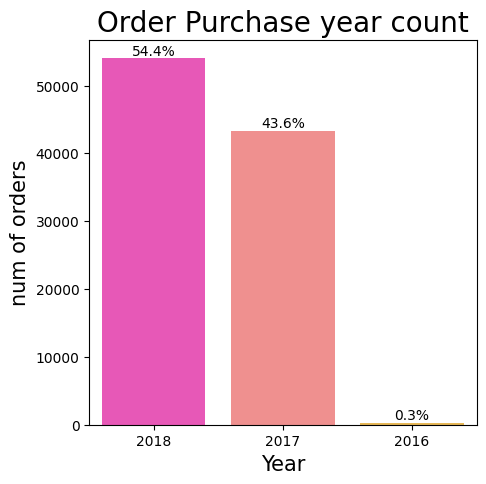

In [266]:
x = orders_customers['order_purchase_year']
order = orders_customers['order_purchase_year'].value_counts().index
count_plot(x, orders_customers, 'Order Purchase year count', 'Year', 'num of orders', 5, 5, order=order, palette='spring')

We can see that their is clear increase in sales after 2016

In [267]:
#order purchased by month wise sale
orders_customers['order_purchase_month_name'].value_counts()

Aug    11386
May    10690
Mar     9895
Jul     9765
Jun     9371
Apr     9143
Feb     8122
Jan     7671
Nov     6669
Dec     6083
Oct     4729
Sep     4134
Name: order_purchase_month_name, dtype: int64

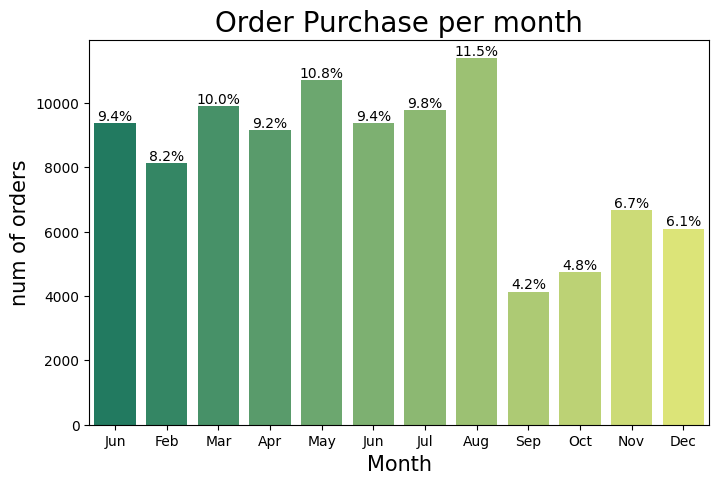

In [268]:
order = ['Jun', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
x = orders_customers['order_purchase_month_name']
count_plot(x,orders_customers, 'Order Purchase per month', 'Month', 'num of orders', 8, 5, order=order, palette='summer')

we can clearly see that august month has more sales of 11.5%

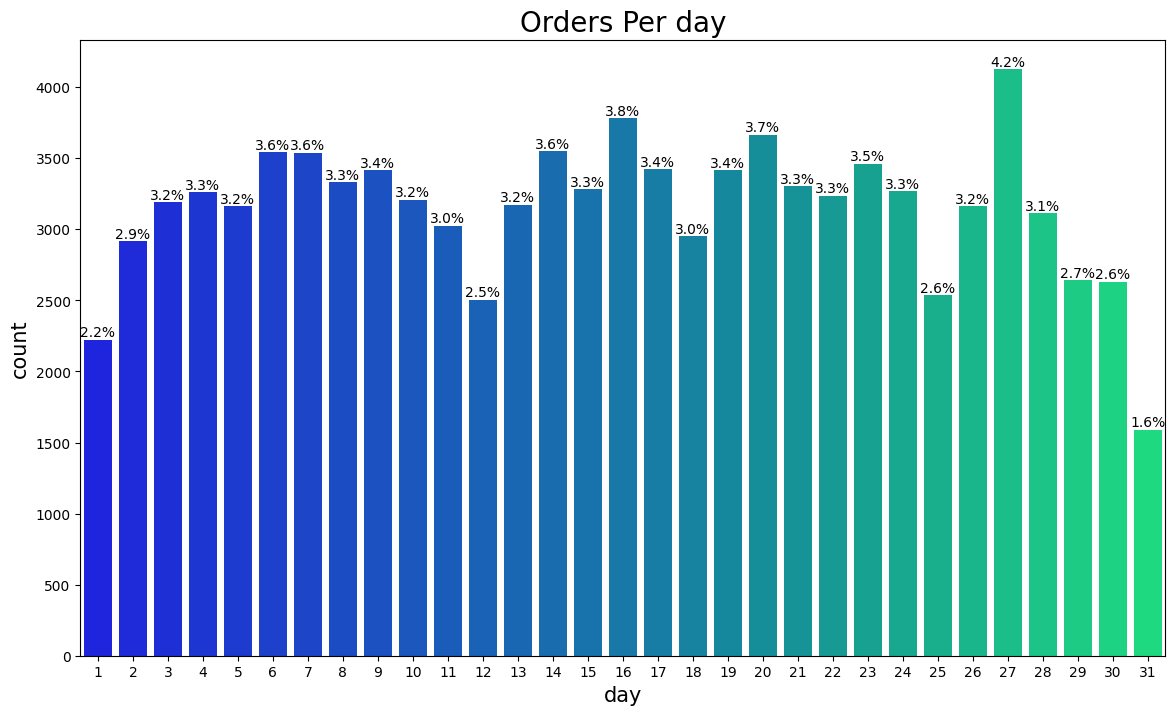

In [269]:
x = orders_customers['order_purchase_day']
order = [str(i) for i in range(1,32)]
count_plot(x, orders_customers, 'Orders Per day', 'day', 'count', 14,8, order=order)

we can see that ina month the 27th day has highest orders which is upto 4.2%

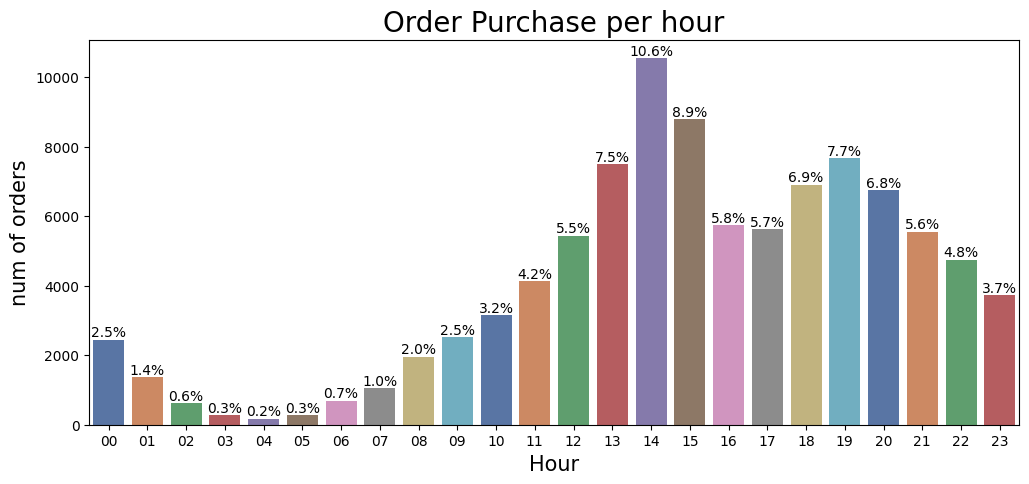

In [270]:
x = orders_customers['order_purchase_hour']
order = [str(i).zfill(2) for i in range(24)]
count_plot(x, orders_customers, 'Order Purchase per hour', 'Hour', 'num of orders', 12, 5, order=order, palette='deep')

Brazilian's customers are prefered to buy 1:00PM and 2:00PM and they tend to buy more at afternoons.

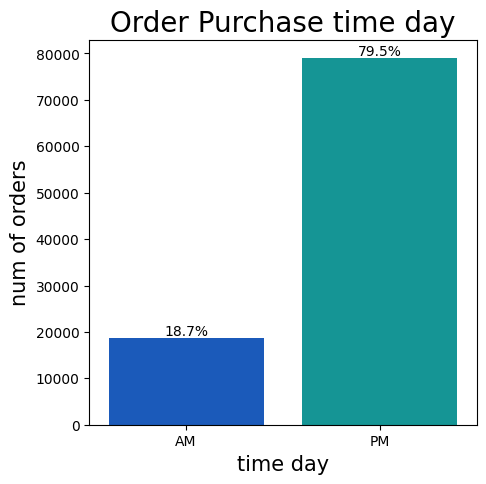

In [271]:
x = orders_customers['order_purchase_time_day']
count_plot(x, orders_customers, 'Order Purchase time day', 'time day', 'num of orders', 5, 5, order=['AM','PM'])

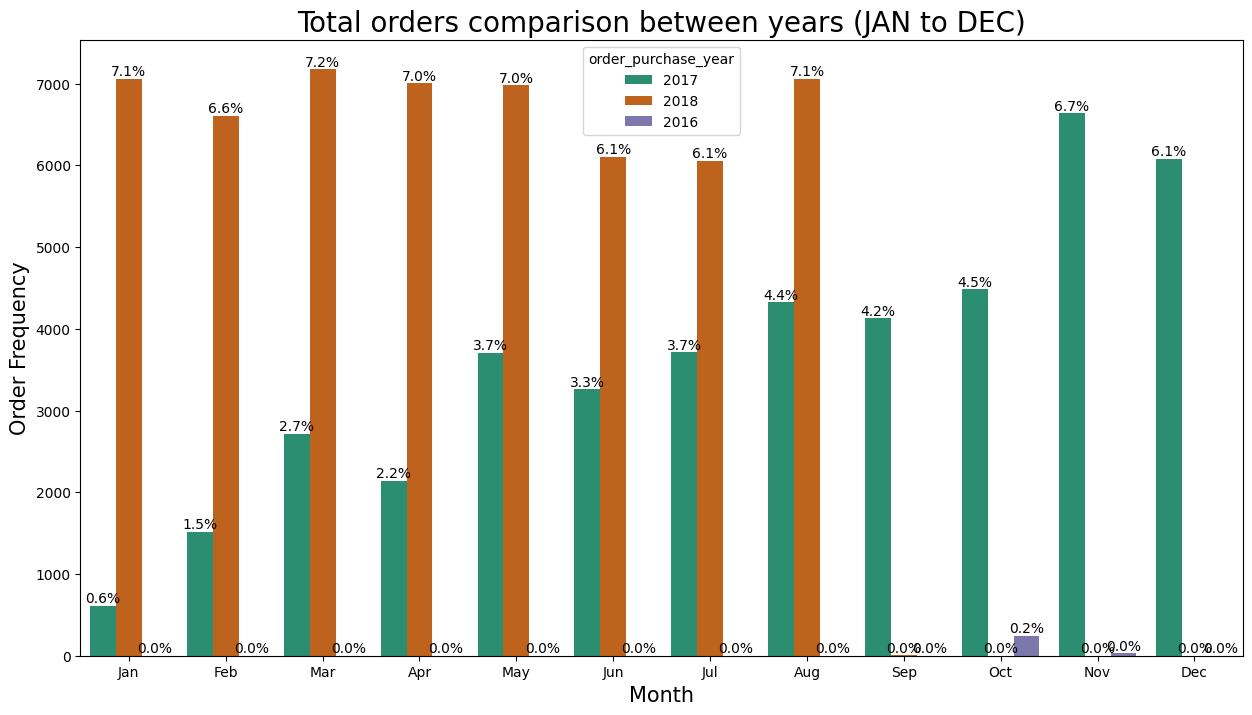

In [272]:
#Lets us compare the purchase of order to see the year wise sales
order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
x = orders_customers['order_purchase_month_name']
hue = orders_customers['order_purchase_year']
count_plot(x,orders_customers, "Total orders comparison between years (JAN to DEC)", "Month", "Order Frequency", 15,8, order=order, palette='Dark2', hue=hue)

It is clear that there is a significant increase in sales from 2017 (JAN to AUG) to 2018 (JAN to AUG)

So now we can purpose a complete analysis on orders amount of brazilian e-commerce during the period of the dataset. For that let's plot three graphs using a GridSpec with the aim answear the following questions:

1. Is there any growing trend on brazilian e-commerce?
2. On what day of week brazilians customers tend to do online purchasing?
3. What time brazilians customers tend do buy (Dawn, Morning, Afternoon or Night)?

In [273]:
time_of_day = []
for time in orders_customers['order_purchase_hour']:

    try:
        time = int(time)
        if time >= 6 and time < 12:
            time_of_day.append('Morning')
        elif time >= 12 and time < 17:
            time_of_day.append('Afternoon')
        elif time >= 17 and time <= 20:
            time_of_day.append('Evening')
        else:
            time_of_day.append('Night')

    except:
        time_of_day.append('Unknown')

In [274]:
orders_customers['classification_time_purchase'] = time_of_day

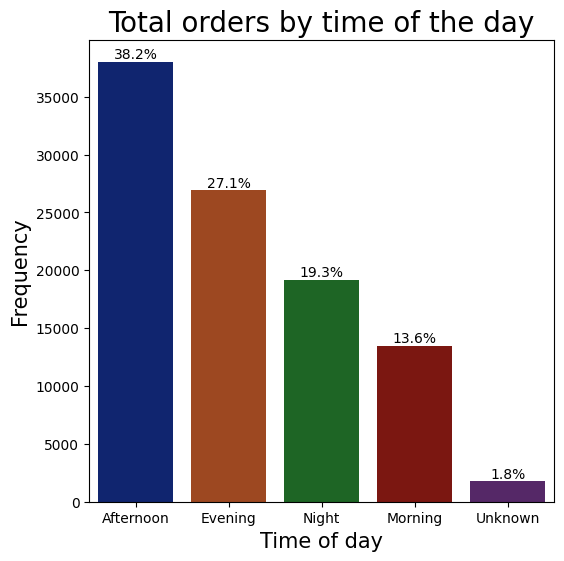

In [275]:
x =orders_customers['classification_time_purchase']
order = x.value_counts().index
count_plot(x, orders_customers,'Total orders by time of the day', 'Time of day' , 'Frequency', 6,6, order=order, palette='dark')

Most of the orders are in afternoon period

In [276]:
orders_customers['customer_state'].value_counts()

SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_state, dtype: int64

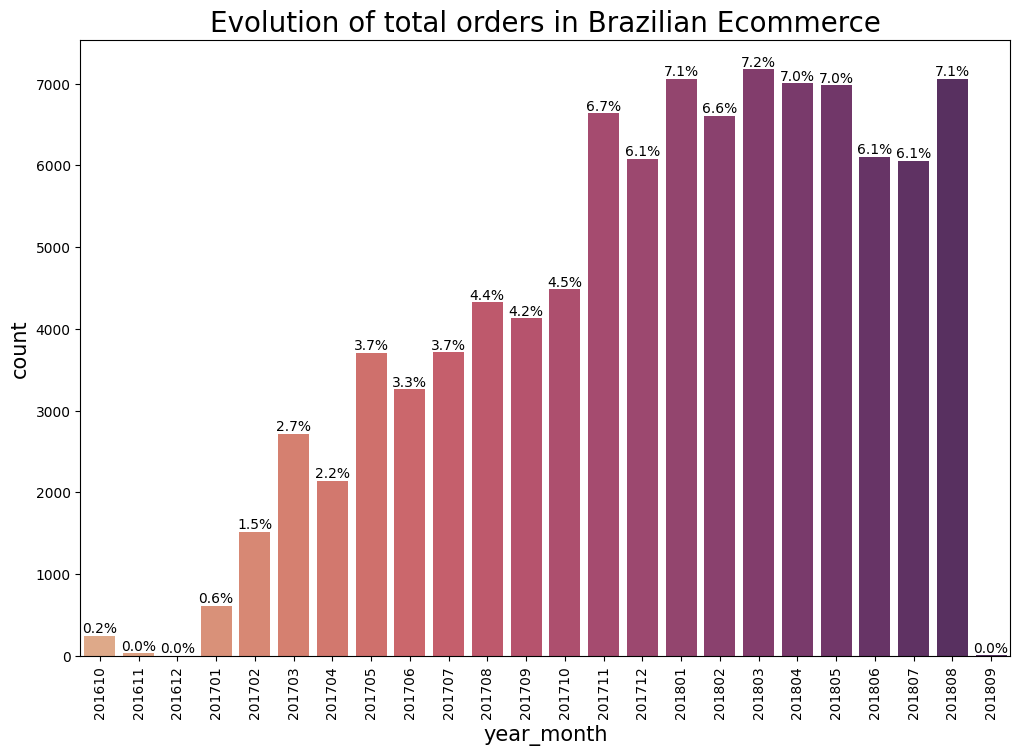

In [277]:
x = orders_customers['order_purchase_year_month'].value_counts().index
y = orders_customers['order_purchase_year_month'].value_counts().values
order = sorted(x)
bar_plot(x, y, orders_customers, "Evolution of total orders in Brazilian Ecommerce", "year_month", "count", 12,8, rotation=True, palette='flare', order=order)

we can see clear that customers are more prone to buy things online than before.

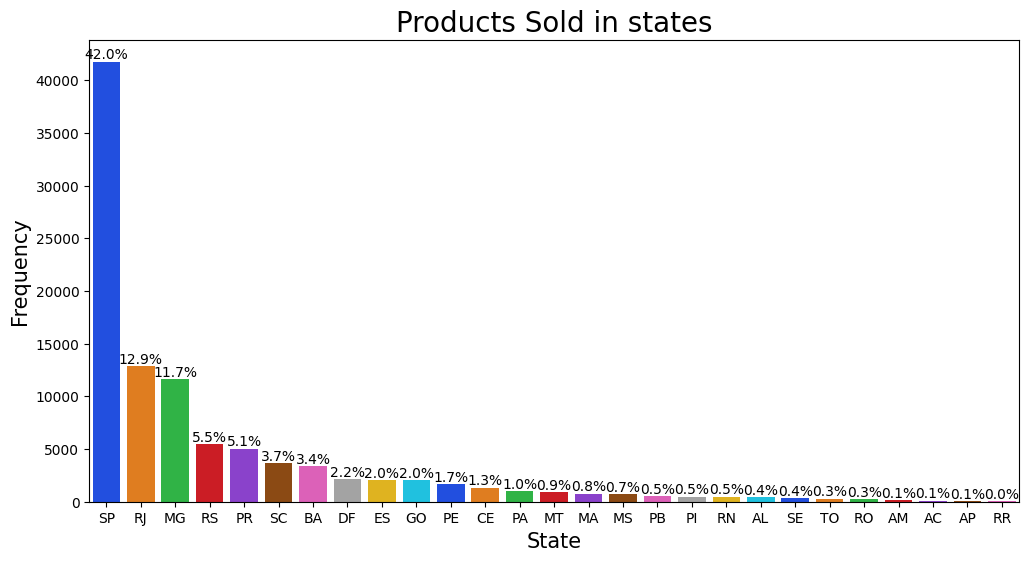

In [278]:
count_plot(orders_customers['customer_state'], orders_customers, "Products Sold in states", "State", 'Frequency',12, 6,
           order=orders_customers['customer_state'].value_counts().index, palette='bright')

A huge sales in SP state of brazil

By the charts above we can conclude:

E-commerce on Brazil really has a growing trend along the time. We can see some seasonality with peaks at specific months, but in general we can see clear that customers are more prone to buy things online than before.

They tend to buy more at afternoons.

Obs: we have a sharp decrease between August 2018 and September 2018 and maybe the origin of that is related to noise on data. For further comparison between 2017 and 2018, let's just consider orders between January and August in both years

#Items dataset

Now, we will analyze the money movemented by e-commerce by looking at order prices, freights and others.

In [279]:
items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#Combining the two dataset orders_customers and items by inner join to get the hidden patterns

How about the e-commerce sales? Did they grow up over time?

In [280]:
cust_orders_items = pd.merge(orders_customers, items, on='order_id')
cust_orders_items.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,orders_delivered_carrier_date,customer_unique_id,...,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day,classification_time_purchase,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-04 19:55:00,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-10 21:25:13,2017-10-04 19:55:00,7c396fd4830fd04220f754e42b4e5bff,...,Wed,19,PM,Evening,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-26 14:31:00,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-07 15:27:45,2018-07-26 14:31:00,af07308b275d755c9edb36a90c618231,...,Thu,14,PM,Afternoon,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 13:50:00,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-08-17 18:06:29,2018-08-08 13:50:00,3a653a41f6f9fc3d2a113cf8398680e8,...,Wed,13,PM,Afternoon,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-22 13:39:59,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-02 00:28:42,2017-11-22 13:39:59,7c142cf63193a1473d2e66489a9ae977,...,Wed,13,PM,Afternoon,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-14 19:46:34,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-16 18:17:02,2018-02-14 19:46:34,72632f0f9dd73dfee390c9b22eb56dd6,...,Wed,19,PM,Evening,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [281]:
prices_over_year_month = cust_orders_items.groupby('order_purchase_timestamp')['price'].agg('sum').reset_index()
prices_over_year_month

,order_purchase_timestamp,price
0,2016-10-08 10:34:01,29.99
1,2016-10-08 13:46:32,47.80
2,2016-10-08 14:46:49,93.90
3,2016-10-09 02:45:17,99.90
4,2016-10-09 03:45:42,319.60
...,...,...
81012,2018-08-31 15:09:00,39.99
81013,2018-08-31 15:25:00,59.99
81014,2018-09-03 12:56:00,2350.00
81015,2018-09-04 15:25:00,145.00


Now, we will analyze the money movemented by e-commerce by looking at order prices, freights and others.

In [282]:
# Grouping data
df_month_aggreg = cust_orders_items.groupby(by=['order_purchase_year', 'order_purchase_year_month'], as_index=False)
df_month_aggreg = df_month_aggreg.agg({
    'order_id': 'count',
    'price': 'sum',
    'freight_value': 'sum'
})

# Adding new columns for analysis
df_month_aggreg['price_per_order'] = df_month_aggreg['price'] / df_month_aggreg['order_id']
df_month_aggreg['freight_per_order'] = df_month_aggreg['freight_value'] / df_month_aggreg['order_id']
df_month_aggreg.head()

,order_purchase_year,order_purchase_year_month,order_id,price,freight_value,price_per_order,freight_per_order
0,2016,201610,296,35884.63,5585.28,121.231858,18.869189
1,2016,201611,35,6103.09,988.17,174.374000,28.233429
2,2016,201612,2,81.90,20.41,40.950000,10.205000
3,2017,201701,726,84469.34,12541.87,116.348953,17.275303
4,2017,201702,1719,224591.15,34115.87,130.652211,19.846347


The price_per_order and shipped / freight per order is more in the year 2016

In [283]:
order_items_silver = cust_orders_items.groupby('order_id').agg({'price':sum,'freight_value':sum,'shipping_limit_date':max }).reset_index()

In [284]:
order_items_silver

,order_id,price,freight_value,shipping_limit_date
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29,2017-09-19 09:45:35
1,00018f77f2f0320c557190d7a144bdd3,239.90,19.93,2017-05-03 11:05:13
2,000229ec398224ef6ca0657da4fc703e,199.00,17.87,2018-01-18 14:48:30
3,00024acbcdf0a6daa1e931b038114c75,12.99,12.79,2018-08-15 10:10:18
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14,2017-02-13 13:57:51
...,...,...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,299.99,43.41,2018-05-02 04:11:01
98662,fffcd46ef2263f404302a634eb57f7eb,350.00,36.53,2018-07-20 04:31:48
98663,fffce4705a9662cd70adb13d4a31832d,99.90,16.95,2017-10-30 17:14:25
98664,fffe18544ffabc95dfada21779c9644f,55.99,8.72,2017-08-21 00:04:32


<Axes: xlabel='price', ylabel='freight_value'>

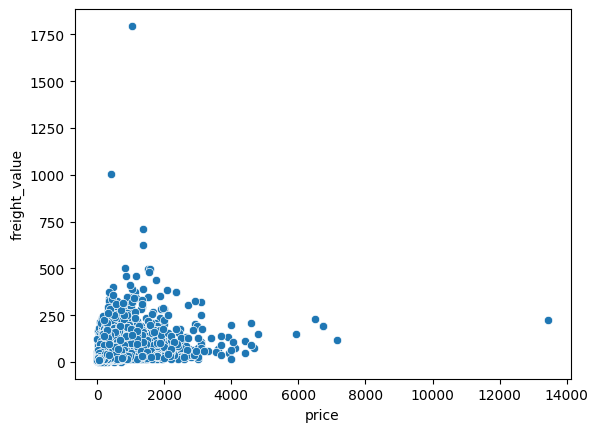

In [285]:
sns.scatterplot(x='price',y='freight_value',data=order_items_silver)

We decided to remove orders with a price over R$ 5000 and for the freight value we used logic as a value that is far away from 99% percentile.

In [286]:
percentil_freight_value = order_items_silver['freight_value'].quantile(0.99)
order_items_silver = order_items_silver[(order_items_silver['price'] <= 5000) & (order_items_silver['freight_value'] <= percentil_freight_value)]

In [287]:
percentil_freight_value

104.98350000000006

Product & Reviews Categories

Here we will check which are the products with the most purchases.

<Axes: title={'center': 'Top 10 categories of products with more orders'}, xlabel='product_category_name'>

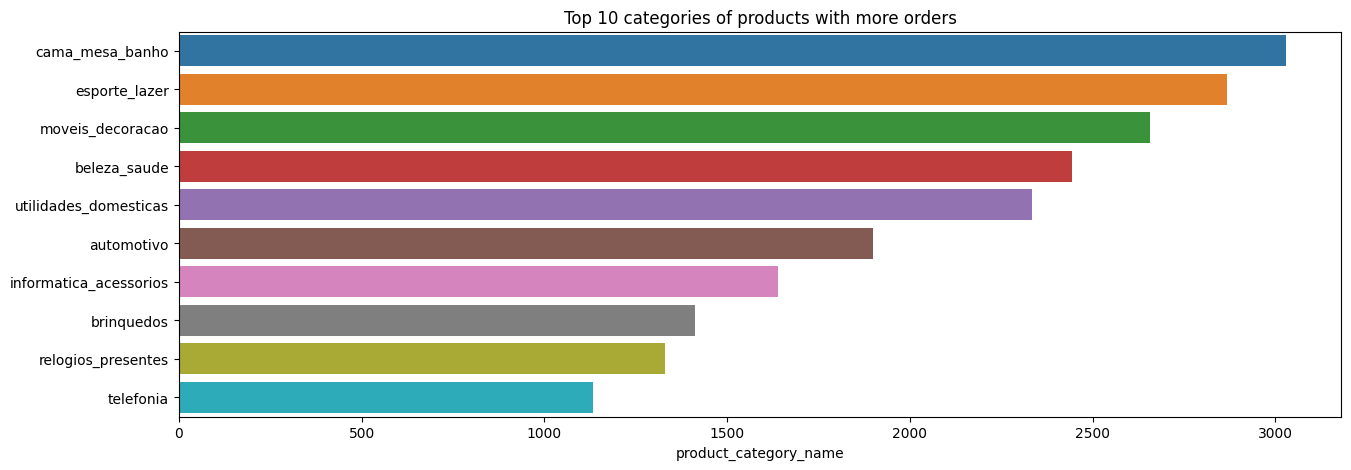

In [288]:
productCategoryOrders = products['product_category_name'].value_counts().head(10)

plt.figure(figsize=(15,5))
plt.title('Top 10 categories of products with more orders')
sns.barplot(y=productCategoryOrders.index, x=productCategoryOrders, orient='h')

In [289]:
# Convert objects date columns to dates desconsidering the errors
dateColumns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

for column in dateColumns:
   df[column] = pd.to_datetime(df[column], errors='coerce')

#Calculate the difference between the estimated date and the delivery (negative values means delay)
df['DiffDeliveryDays'] = ((df['order_estimated_delivery_date'] - df['order_delivered_customer_date']).dt.days) + 1

#Calculate the time between end of purchase and delivery
df['DeliveryCountDays'] = ((df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days)

In [290]:
df[['order_estimated_delivery_date', 'order_delivered_customer_date', 'DiffDeliveryDays', 'order_purchase_timestamp','DeliveryCountDays']]

,order_estimated_delivery_date,order_delivered_customer_date,DiffDeliveryDays,order_purchase_timestamp,DeliveryCountDays
0,2017-10-18,2017-10-10 21:25:13,8.0,2017-10-02 10:56:33,8.0
1,2017-10-18,2017-10-10 21:25:13,8.0,2017-10-02 10:56:33,8.0
2,2017-10-18,2017-10-10 21:25:13,8.0,2017-10-02 10:56:33,8.0
3,2018-08-13,2018-08-07 15:27:45,6.0,2018-07-24 20:41:37,13.0
4,2018-09-04,2018-08-17 18:06:29,18.0,2018-08-08 08:38:49,9.0
...,...,...,...,...,...
119138,2018-03-02,2018-02-28 17:37:56,2.0,2018-02-06 12:58:58,22.0
119139,2017-09-27,2017-09-21 11:24:17,6.0,2017-08-27 14:46:43,24.0
119140,2018-02-15,2018-01-25 23:32:54,21.0,2018-01-08 21:28:27,17.0
119141,2018-02-15,2018-01-25 23:32:54,21.0,2018-01-08 21:28:27,17.0


Clearly, we notice that earlier and faster deliveries tend

In [291]:
order_items=pd.read_csv("/content/drive/MyDrive/unzip/olist_order_items_dataset.csv")

In [292]:
# creating master dataframe

payments.head()
df1 = payments.merge(order_items, on='order_id')
df2 = df1.merge(orders, on='order_id')
df = df2.merge(customers, on='customer_id')
print(df.shape)

(117601, 23)


In [293]:
# converting date columns to datetime
date_columns = ['shipping_limit_date', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], format='%Y-%m-%d %H:%M:%S')

In [294]:
# cleaning up name columns
df['customer_city'] = df['customer_city'].str.title()
df['payment_type'] = df['payment_type'].str.replace('_', ' ').str.title()
# engineering new/essential columns
df['delivery_against_estimated'] = (df['order_estimated_delivery_date'] - df['order_delivered_customer_date']).dt.days
df['order_purchase_year'] = df.order_purchase_timestamp.apply(lambda x: x.year)
df['order_purchase_month'] = df.order_purchase_timestamp.apply(lambda x: x.month)
df['order_purchase_dayofweek'] = df.order_purchase_timestamp.apply(lambda x: x.dayofweek)
df['order_purchase_hour'] = df.order_purchase_timestamp.apply(lambda x: x.hour)
df['order_purchase_day'] = df['order_purchase_dayofweek'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})
df['order_purchase_mon'] = df.order_purchase_timestamp.apply(lambda x: x.month).map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
# Changing the month attribute for correct ordenation
df['month_year'] = df['order_purchase_month'].astype(str).apply(lambda x: '0' + x if len(x) == 1 else x)
df['month_year'] = df['order_purchase_year'].astype(str) + '-' + df['month_year'].astype(str)
#creating year month column
df['month_y'] = df['order_purchase_timestamp'].map(lambda date: 100*date.year + date.month)

In [295]:
# displaying summary staticstics of columns
df.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,...,customer_state,delivery_against_estimated,order_purchase_year,order_purchase_month,order_purchase_dayofweek,order_purchase_hour,order_purchase_day,order_purchase_mon,month_year,month_y
count,117601,117601.000000,117601,117601.000000,117601.000000,117601.000000,117601,117601,117601,117601.000000,...,117601,115034.0,116356.000000,116356.000000,116356.000000,116356.000000,116356,116356,117601,116356.000000
unique,98665,NaN,4,NaN,NaN,NaN,32951,3095,93317,NaN,...,27,NaN,NaN,NaN,NaN,NaN,7,12,25,NaN
top,895ab968e7bb0d5659d16cd74cd1650c,NaN,Credit Card,NaN,NaN,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,4a3ca9315b744ce9f8e9374361493884,2017-08-14 20:43:31,NaN,...,SP,NaN,NaN,NaN,NaN,NaN,Tue,Aug,2018.0-3.0,NaN
freq,63,NaN,86769,NaN,NaN,NaN,536,2133,63,NaN,...,49566,NaN,NaN,NaN,NaN,NaN,25934,13475,8568,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-09-19 00:15:34,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-09 22:35:08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.093528,NaN,2.939482,172.686752,1.195900,NaN,NaN,NaN,120.824783,...,NaN,0.0,2017.546977,6.047509,1.960114,15.091486,NaN,NaN,NaN,201760.745161
std,NaN,0.726692,NaN,2.774223,267.592290,0.697706,NaN,NaN,NaN,184.479323,...,NaN,0.0,0.503763,3.218107,1.443815,5.158294,NaN,NaN,NaN,48.667176
min,NaN,1.000000,NaN,0.000000,0.000000,1.000000,NaN,NaN,NaN,0.850000,...,NaN,0.0,2016.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,201610.000000
25%,NaN,1.000000,NaN,1.000000,60.870000,1.000000,NaN,NaN,NaN,39.900000,...,NaN,0.0,2017.000000,3.000000,1.000000,13.000000,NaN,NaN,NaN,201709.000000


In [296]:
# displaying missing value counts and corresponding percentage against total observations
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([missing_values, percentage], axis=1, keys=['Values', 'Percentage']).transpose()

,order_delivered_customer_date,delivery_against_estimated,order_estimated_delivery_date,order_purchase_timestamp,order_purchase_mon,order_purchase_day,order_purchase_hour,order_purchase_dayofweek,order_purchase_month,order_purchase_year,...,seller_id,customer_state,customer_city,customer_zip_code_prefix,customer_unique_id,price,freight_value,payment_sequential,customer_id,order_id
Values,2567.000000,2567.000000,2567.000000,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percentage,2.182805,2.182805,2.182805,1.058664,1.058664,1.058664,1.058664,1.058664,1.058664,1.058664,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [297]:
# dropping missing values
df.dropna(inplace=True)
df.isnull().values.any()

False

In [298]:
# excluding incomplete 2012 data and displaying first 3 rows of master dataframe
df = df.query("month_year != '2016-12' and month_year != '2016-10'")
df.head(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,...,customer_state,delivery_against_estimated,order_purchase_year,order_purchase_month,order_purchase_dayofweek,order_purchase_hour,order_purchase_day,order_purchase_mon,month_year,month_y
0,b81ef226f3fe1789b1e8b2acac839d17,1,Credit Card,8,99.33,1,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:09,79.80,...,MG,0.0,2018.0,5.0,2.0,15.0,Wed,May,2018.0-5.0,201805.0
1,a9810da82917af2d9aefd1278f1dcfa0,1,Credit Card,1,24.39,1,a630cc320a8c872f9de830cf121661a3,eaf6d55068dea77334e8477d3878d89e,2018-07-02 11:18:58,17.00,...,SP,0.0,2018.0,6.0,3.0,14.0,Thu,Jun,2018.0-6.0,201806.0
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,Credit Card,1,65.71,1,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,2017-12-26 09:52:34,56.99,...,SP,0.0,2017.0,12.0,4.0,20.0,Fri,Dec,2017.0-12.0,201712.0


The above master dataframe constitutes of the various independent dataset provided joined together via unique keys. Date columns have also been converted to datetime and new essential columns engineered for analysis purpose.

#Monthly Revenue

In [299]:
#calculate Revenue for each row and create a new dataframe with YearMonth - Revenue columns
df_revenue = df.groupby(['month_year'])['payment_value'].sum().reset_index()
df_revenue

,month_year,payment_value
0,2016.0-10.0,55808.55
1,2016.0-11.0,6700.41
2,2016.0-12.0,102.31
3,2017.0-1.0,123994.22
4,2017.0-10.0,1085693.23
5,2017.0-11.0,1413000.08
6,2017.0-12.0,1148007.11
7,2017.0-2.0,310046.92
8,2017.0-3.0,535714.34
9,2017.0-4.0,404795.74


#Monthly Revenue Growth Rate

In [300]:
#calculating for monthly revenie growth rate
# using pct_change() function to see monthly percentage change
df_revenue['MonthlyGrowth'] = df_revenue['payment_value'].pct_change()

df_revenue

,month_year,payment_value,MonthlyGrowth
0,2016.0-10.0,55808.55,NaN
1,2016.0-11.0,6700.41,-0.879939
2,2016.0-12.0,102.31,-0.984731
3,2017.0-1.0,123994.22,1210.946242
4,2017.0-10.0,1085693.23,7.755999
5,2017.0-11.0,1413000.08,0.301473
6,2017.0-12.0,1148007.11,-0.187539
7,2017.0-2.0,310046.92,-0.729926
8,2017.0-3.0,535714.34,0.727849
9,2017.0-4.0,404795.74,-0.244381


#New Customer Ratio

In [301]:
#create a dataframe contaning CustomerID and first purchase date
df_min_purchase = df.groupby('customer_unique_id').order_purchase_timestamp.min().reset_index()
df_min_purchase.columns = ['customer_unique_id','minpurchasedate']
df_min_purchase['minpurchasedate'] = df_min_purchase['minpurchasedate'].map(lambda date: 100*date.year + date.month)

#merge first purchase date column to our main dataframe (tx_uk)
df = pd.merge(df, df_min_purchase, on='customer_unique_id')

In [302]:
#create a column called User Type and assign Existing
#if User's First Purchase Year Month before the selected Invoice Year Month
df['usertype'] = 'New'
df.loc[df['month_y']>df['minpurchasedate'],'usertype'] = 'Existing'

#calculate the Revenue per month for each user type
df_user_type_revenue = df.groupby(['month_y','usertype', 'month_year'])['payment_value'].sum().reset_index()

df_user_type_revenue

,month_y,usertype,month_year,payment_value
0,201610.0,New,2016.0-10.0,55808.55
1,201611.0,Existing,2016.0-11.0,252.24
2,201611.0,New,2016.0-11.0,6448.17
3,201612.0,New,2016.0-12.0,102.31
4,201701.0,Existing,2017.0-1.0,19.62
5,201701.0,New,2017.0-1.0,123974.60
6,201702.0,Existing,2017.0-2.0,1459.93
7,201702.0,New,2017.0-2.0,308586.99
8,201703.0,Existing,2017.0-3.0,813.25
9,201703.0,New,2017.0-3.0,534901.09


In [303]:
#Monthly Retention Rate = Retained Customers From Prev. Month/Active Customers Total (using crosstab)

#identifying active users are active by looking at their revenue per month
df_user_purchase = df.groupby(['customer_unique_id','month_y'])['payment_value'].sum().reset_index()
df_user_purchase.head()

,customer_unique_id,month_y,payment_value
0,0000366f3b9a7992bf8c76cfdf3221e2,201805.0,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,201805.0,27.19
2,0000f46a3911fa3c0805444483337064,201703.0,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,201710.0,43.62
4,0004aac84e0df4da2b147fca70cf8255,201711.0,196.89


#Monthly retention rate by customer

In [304]:
#create retention matrix with crosstab using purchase
df_retention = pd.crosstab(df_user_purchase['customer_unique_id'], df_user_purchase['month_y']).reset_index()
df_retention.head()

month_y,customer_unique_id,201610.0,201611.0,201612.0,201701.0,201702.0,201703.0,201704.0,201705.0,201706.0,...,201712.0,201801.0,201802.0,201803.0,201804.0,201805.0,201806.0,201807.0,201808.0,201809.0
0,0000366f3b9a7992bf8c76cfdf3221e2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0000f46a3911fa3c0805444483337064,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0000f6ccb0745a6a4b88665a16c9f078,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0004aac84e0df4da2b147fca70cf8255,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [305]:
#creating an array of dictionary which keeps Retained & Total User count for each month
months = df_retention.columns[2:]
retention_array = []
for i in range(len(months)-1):
    retention_data = {}
    selected_month = months[i+1]
    prev_month = months[i]
    retention_data['month_y'] = int(selected_month)
    retention_data['TotalUserCount'] = df_retention[selected_month].sum()
    retention_data['RetainedUserCount'] = df_retention[(df_retention[selected_month]>0) & (df_retention[prev_month]>0)][selected_month].sum()
    retention_array.append(retention_data)

#convert the array to dataframe and calculate Retention Rate
df_retention = pd.DataFrame(retention_array)
df_retention['RetentionRate'] = df_retention['RetainedUserCount']/df_retention['TotalUserCount']

df_retention

,month_y,TotalUserCount,RetainedUserCount,RetentionRate
0,201612,2,0,0.000000
1,201701,575,1,0.001739
2,201702,1464,8,0.005464
3,201703,2633,5,0.001899
4,201704,2072,13,0.006274
5,201705,3592,19,0.005290
6,201706,3151,22,0.006982
7,201707,3596,14,0.003893
8,201708,4210,23,0.005463
9,201709,4028,32,0.007944


#Conclusion:

Through the exploration of the Brazilian e-commerce dataset, we uncovered valuable insights. This analysis underscores the paramount importance of businesses maintaining up-to-date and high-quality databases. In today's data-driven landscape, possessing accurate information is not just advantageous—it's vital.

Databases form the backbone of data science. A solid foundation ensures accurate analytics, leading to informed business decisions. Proper data analysis enables companies to identify trends, evaluate strategies, and tailor approaches to align with business goals.



---



---
                              ***End of the EDA***













---



#Part 2: Predictive Modeling

Objective:
Build a predictive model to forecast customer purchases.


project set-up

In [306]:
!pip install calmap
!pip install pmdarima

Importing libraries for forecasting

In [307]:
import tensorflow as tf
from IPython.display import display
from keras.layers import LSTM, Dense
from keras import Sequential
from keras.backend import clear_session
from keras.callbacks import EarlyStopping
from keras.preprocessing.sequence import TimeseriesGenerator
from pmdarima.arima import ARIMA as pmdARIMA
from pmdarima.arima import ADFTest, KPSSTest, auto_arima
from pmdarima.utils import diff_inv
from scipy.special import boxcox1p, inv_boxcox1p
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import STL
from tensorflow.keras.optimizers import Adam

Data  forecasting

In [308]:
df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,...,order_purchase_year,order_purchase_month,order_purchase_dayofweek,order_purchase_hour,order_purchase_day,order_purchase_mon,month_year,month_y,minpurchasedate,usertype
0,b81ef226f3fe1789b1e8b2acac839d17,1,Credit Card,8,99.33,1,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:09,79.80,...,2018.0,5.0,2.0,15.0,Wed,May,2018.0-5.0,201805.0,201805,New
1,a9810da82917af2d9aefd1278f1dcfa0,1,Credit Card,1,24.39,1,a630cc320a8c872f9de830cf121661a3,eaf6d55068dea77334e8477d3878d89e,2018-07-02 11:18:58,17.00,...,2018.0,6.0,3.0,14.0,Thu,Jun,2018.0-6.0,201806.0,201806,New
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,Credit Card,1,65.71,1,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,2017-12-26 09:52:34,56.99,...,2017.0,12.0,4.0,20.0,Fri,Dec,2017.0-12.0,201712.0,201712,New
3,ba78997921bbcdc1373bb41e913ab953,1,Credit Card,8,107.78,1,548e5bfe28edceab6b51fa707cc9556f,da8622b14eb17ae2831f4ac5b9dab84a,2017-12-12 12:13:20,89.90,...,2017.0,12.0,3.0,20.0,Thu,Dec,2017.0-12.0,201712.0,201712,New
4,42fdf880ba16b47b59251dd489d4441a,1,Credit Card,2,128.45,1,386486367c1f9d4f587a8864ccb6902b,cca3071e3e9bb7d12640c9fbe2301306,2018-05-31 16:14:41,113.57,...,2018.0,5.0,1.0,11.0,Tue,May,2018.0-5.0,201805.0,201805,New


As observed on Partial Autocorrelation plot, a shift of 1 will be sufficient for a regression model. So, we will create this new feature to apply a regression model to forecast next week's price

#Find the best regression model

In [309]:
order_forecast=pd.read_csv("/content/drive/MyDrive/unzip/olist_orders_dataset.csv")

In [310]:
order_forecast

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [311]:
orders_payment_forecast=pd.read_csv("/content/drive/MyDrive/unzip/olist_order_payments_dataset.csv")

In [312]:
orders_payment_forecast

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [313]:
df_train = orders.merge(items, on='order_id', how='left')
df_train = df_train.merge(payments, on='order_id', how='outer', validate='m:m')
df_train = df_train.merge(reviews, on='order_id', how='outer')
df_train = df_train.merge(products, on='product_id', how='outer')
df_train = df_train.merge(customers, on='customer_id', how='outer')
df_train = df_train.merge(sellers, on='seller_id', how='outer')

print(df_train.info())
print('\nInfo dataset:')
df_train.head().T

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119143 entries, 0 to 119142
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       119143 non-null  object        
 1   customer_id                    119143 non-null  object        
 2   order_status                   119143 non-null  object        
 3   order_purchase_timestamp       117057 non-null  datetime64[ns]
 4   order_approved_at              118966 non-null  object        
 5   order_delivered_carrier_date   117057 non-null  datetime64[ns]
 6   order_delivered_customer_date  115722 non-null  object        
 7   order_estimated_delivery_date  115722 non-null  datetime64[ns]
 8   orders_delivered_carrier_date  117057 non-null  datetime64[ns]
 9   order_item_id                  118310 non-null  float64       
 10  product_id                     118310 non-null  object        
 11  

,0,1,2,3,4
order_id,e481f51cbdc54678b7cc49136f2d6af7,e481f51cbdc54678b7cc49136f2d6af7,e481f51cbdc54678b7cc49136f2d6af7,128e10d95713541c87cd1a2e48201934,0e7e841ddf8f8f2de2bad69267ecfbcf
customer_id,9ef432eb6251297304e76186b10a928d,9ef432eb6251297304e76186b10a928d,9ef432eb6251297304e76186b10a928d,a20e8105f23924cd00833fd87daa0831,26c7ac168e1433912a51b924fbd34d34
order_status,delivered,delivered,delivered,delivered,delivered
order_purchase_timestamp,2017-10-04 19:55:00,2017-10-04 19:55:00,2017-10-04 19:55:00,2017-08-17 15:28:33,2017-08-04 17:35:43
order_approved_at,2017-10-02 11:07:15,2017-10-02 11:07:15,2017-10-02 11:07:15,2017-08-15 20:05:16,2017-08-02 18:43:15
order_delivered_carrier_date,2017-10-04 19:55:00,2017-10-04 19:55:00,2017-10-04 19:55:00,2017-08-17 15:28:33,2017-08-04 17:35:43
order_delivered_customer_date,2017-10-10 21:25:13,2017-10-10 21:25:13,2017-10-10 21:25:13,2017-08-18 14:44:43,2017-08-07 18:30:01
order_estimated_delivery_date,2017-10-10 21:25:13,2017-10-10 21:25:13,2017-10-10 21:25:13,2017-08-18 14:44:43,2017-08-07 18:30:01
orders_delivered_carrier_date,2017-10-04 19:55:00,2017-10-04 19:55:00,2017-10-04 19:55:00,2017-08-17 15:28:33,2017-08-04 17:35:43
order_item_id,1.0,1.0,1.0,1.0,1.0


In [314]:
from scipy import stats

In [315]:
def resumetable(df_train):
    print(f"Dataset Shape: {df_train.shape}")
    summary = pd.DataFrame(df_train.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df_train.isnull().sum().values
    summary['Uniques'] = df_train.nunique().values
    summary['First Value'] = df_train.loc[0].values
    summary['Second Value'] = df_train.loc[1].values
    summary['Third Value'] = df_train.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df_train[name].value_counts(normalize=True), base=2),2)

    return summary

def cross_heatmap(df_train, cols, normalize=False, values=None, aggfunc=None):
    temp = cols
    cm = sns.light_palette("green", as_cmap=True)
    return pd.crosstab(df_train[temp[0]], df_train[temp[1]],
                       normalize=normalize, values=values, aggfunc=aggfunc).style.background_gradient(cmap = cm)

In [316]:
resumetable(df_train)

Dataset Shape: (119143, 40)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,order_id,object,0,99441,e481f51cbdc54678b7cc49136f2d6af7,e481f51cbdc54678b7cc49136f2d6af7,e481f51cbdc54678b7cc49136f2d6af7,16.46
1,customer_id,object,0,99441,9ef432eb6251297304e76186b10a928d,9ef432eb6251297304e76186b10a928d,9ef432eb6251297304e76186b10a928d,16.46
2,order_status,object,0,8,delivered,delivered,delivered,0.25
3,order_purchase_timestamp,datetime64[ns],2086,81018,2017-10-04 19:55:00,2017-10-04 19:55:00,2017-10-04 19:55:00,16.03
4,order_approved_at,object,177,90733,2017-10-02 11:07:15,2017-10-02 11:07:15,2017-10-02 11:07:15,16.28
5,order_delivered_carrier_date,datetime64[ns],2086,81018,2017-10-04 19:55:00,2017-10-04 19:55:00,2017-10-04 19:55:00,16.03
6,order_delivered_customer_date,object,3421,95664,2017-10-10 21:25:13,2017-10-10 21:25:13,2017-10-10 21:25:13,16.40
7,order_estimated_delivery_date,datetime64[ns],3421,95664,2017-10-10 21:25:13,2017-10-10 21:25:13,2017-10-10 21:25:13,16.40
8,orders_delivered_carrier_date,datetime64[ns],2086,81018,2017-10-04 19:55:00,2017-10-04 19:55:00,2017-10-04 19:55:00,16.03
9,order_item_id,float64,833,21,1.0,1.0,1.0,0.72


In [317]:
# feature engineering 1
#convert to datetime
df_train['order_purchase_timestamp'] = pd.to_datetime(df_train['order_purchase_timestamp'])
#Year
df_train['year'] = df_train['order_purchase_timestamp'].dt.year
#Month
df_train['month'] = df_train['order_purchase_timestamp'].dt.month
#month year
df_train['month_year'] = df_train['order_purchase_timestamp'].dt.to_period('M')

#day of week
df_train['day_of_week'] = df_train['order_purchase_timestamp'].dt.dayofweek
#week days by number

day_name = {0 : 'Monday', 1 : 'Tuesday', 2 : 'Wednesday', 3 : 'Thursday', 4 : 'Friday', 5 : 'Saturday', 6 : 'Sunday'}
df_train['day_name'] = df_train['day_of_week'].map(day_name)
#hour

df_train['hour'] = df_train['order_purchase_timestamp'].dt.hour


def pod(x):
    if (x >= 5) & (x < 12):
        return 'morning'
    elif (x >= 12) & (x < 17):
        return 'afternoon'
    elif (x >= 17) & (x < 21):
        return 'evening'
    else:
        return 'night'
df_train['parts_of_day'] = df_train['hour'].apply(pod)

df_train["Dt_Customer"] = pd.to_datetime(df_train["order_purchase_timestamp"])
dates = []
for i in df_train["Dt_Customer"]:
    i = i.date()
    dates.append(i)

# Year becoming a Customer
df_train['Year_Customer'] = pd.DatetimeIndex(df_train['Dt_Customer']).year

# Total Purchases
purchases_cols = [col for col in df_train.columns if 'order_item_id' in col]
df_train['order_item_id'] = df_train[purchases_cols].sum(axis=1)

#Total price value
df_train['total_price'] = df_train['order_item_id'] * df_train['price']

#Total freight value
df_train['total_freight_value'] = df_train['order_item_id'] * df_train['price']

#Total order value (total price + total freight)
df_train['total_order_value'] = df_train['total_price'] + df_train['total_freight_value']

In [318]:
# feature engineering 1
# view new features, by customer ID
fe_1=df_train[['customer_city', 'customer_state','customer_unique_id','customer_id', 'Year_Customer', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'review_score', 'day_name', 'parts_of_day', 'day_of_week', 'total_price']]
fe_1.head().T

,0,1,2,3,4
customer_city,sao paulo,sao paulo,sao paulo,sao paulo,sao paulo
customer_state,SP,SP,SP,SP,SP
customer_unique_id,7c396fd4830fd04220f754e42b4e5bff,7c396fd4830fd04220f754e42b4e5bff,7c396fd4830fd04220f754e42b4e5bff,3a51803cc0d012c3b5dc8b7528cb05f7,ef0996a1a279c26e7ecbd737be23d235
customer_id,9ef432eb6251297304e76186b10a928d,9ef432eb6251297304e76186b10a928d,9ef432eb6251297304e76186b10a928d,a20e8105f23924cd00833fd87daa0831,26c7ac168e1433912a51b924fbd34d34
Year_Customer,2017.0,2017.0,2017.0,2017.0,2017.0
order_purchase_timestamp,2017-10-04 19:55:00,2017-10-04 19:55:00,2017-10-04 19:55:00,2017-08-17 15:28:33,2017-08-04 17:35:43
order_approved_at,2017-10-02 11:07:15,2017-10-02 11:07:15,2017-10-02 11:07:15,2017-08-15 20:05:16,2017-08-02 18:43:15
order_delivered_carrier_date,2017-10-04 19:55:00,2017-10-04 19:55:00,2017-10-04 19:55:00,2017-08-17 15:28:33,2017-08-04 17:35:43
order_delivered_customer_date,2017-10-10 21:25:13,2017-10-10 21:25:13,2017-10-10 21:25:13,2017-08-18 14:44:43,2017-08-07 18:30:01
review_score,4.0,4.0,4.0,4.0,5.0


In [319]:
# feature engineering 2
# calculating total orders
total_order = df_train.groupby('customer_id')[['order_id']].count().sort_values(by = 'order_id', ascending = False).reset_index()
total_order = total_order.rename(columns = {'order_id' : 'total_order'})

#Giving the range to create frequency
def freq(x):
    if x <= 3:
        return 'few'
    else:
        return 'many'
total_order['order_frequency'] = total_order['total_order'].apply(freq)


#First purchase of the customer
first_purchase = df_train.groupby(['customer_id'])['order_purchase_timestamp'].min()
first_purchase = pd.DataFrame(data = first_purchase).reset_index()
first_purchase = first_purchase.rename(columns = {'order_purchase_timestamp' : 'first_purchase_date'})

#last purchase of the customer
last_purchase = df_train.groupby(['customer_id'])['order_purchase_timestamp'].max()
last_purchase = pd.DataFrame(data = last_purchase).reset_index()
last_purchase = last_purchase.rename(columns = {'order_purchase_timestamp' : 'last_purchase_date'})

#Purchase date by merging two columns
purchase_date = pd.merge(left = first_purchase, right = last_purchase, on = 'customer_id')

purchase_date = purchase_date.merge(right = total_order, how = 'left', on = 'customer_id')
#Difference between last and first purchase date
purchase_date['delta_last_first'] = (purchase_date['last_purchase_date'] - purchase_date['first_purchase_date']).dt.days

purchase_date['avg_days_1_order'] = purchase_date['delta_last_first'] / purchase_date['total_order']

#To see customer is active or not active
def activity(x):
    if (x <= 120) & (x >= 1):
        return 'active'
    elif x > 120:
        return 'passive I'
    else:
        return 'passive II'

purchase_date['activity_status'] = purchase_date['avg_days_1_order'].apply(activity)


purchase_date['recency_days'] = (purchase_date['last_purchase_date'].max() - purchase_date['last_purchase_date']).dt.days

purchase_date.head()

,customer_id,first_purchase_date,last_purchase_date,total_order,order_frequency,delta_last_first,avg_days_1_order,activity_status,recency_days
0,00012a2ce6f8dcda20d059ce98491703,2017-11-17 15:32:08,2017-11-17 15:32:08,1,few,0.0,0.0,passive II,298.0
1,000161a058600d5901f007fab4c27140,2017-07-19 19:09:37,2017-07-19 19:09:37,1,few,0.0,0.0,passive II,419.0
2,0001fd6190edaaf884bcaf3d49edf079,2017-03-01 15:24:20,2017-03-01 15:24:20,1,few,0.0,0.0,passive II,559.0
3,0002414f95344307404f0ace7a26f1d5,2017-08-19 11:34:29,2017-08-19 11:34:29,1,few,0.0,0.0,passive II,388.0
4,000379cdec625522490c315e70c7a9fb,2018-04-04 18:11:09,2018-04-04 18:11:09,1,few,0.0,0.0,passive II,160.0


In [320]:
# feature engineering 3
# total order value per order
avg_order_value = df_train.groupby('customer_id')['total_order_value'].mean().reset_index()
avg_order_value = pd.DataFrame(data = avg_order_value).rename(columns = {'total_order_value' : 'avg_value_per_order'})

def value(x):
    if x >= 2500.00:
        return 'expensive'
    elif (x < 2500.00) & (x > 1000.00):
        return 'normal'
    else:
        return 'cheap'

avg_order_value['value_type'] = avg_order_value['avg_value_per_order'].apply(value)
avg_order_value.head()

,customer_id,avg_value_per_order,value_type
0,00012a2ce6f8dcda20d059ce98491703,179.60,cheap
1,000161a058600d5901f007fab4c27140,109.80,cheap
2,0001fd6190edaaf884bcaf3d49edf079,359.98,cheap
3,0002414f95344307404f0ace7a26f1d5,299.80,cheap
4,000379cdec625522490c315e70c7a9fb,186.00,cheap


In [321]:
print("The newest customer's enrolment date in the records:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in the records: 2018-09-11
The oldest customer's enrolment date in the records: 2016-10-08


In [322]:
# feature engineering 4
jumlah_order = df_train["customer_id"].value_counts()
jumlah_order_times = []
jumlah_order_names = []
for i in range(len(jumlah_order)):
    jumlah_order_names.append(jumlah_order.keys()[i])
    jumlah_order_times.append(jumlah_order[i])

jumlah_order_customer = pd.DataFrame({"customer_id":jumlah_order_names,"Berapa Kali Pembelian":jumlah_order_times})
jumlah_order_customer.head()

,customer_id,Berapa Kali Pembelian
0,270c23a11d024a44c896d1894b261a83,63
1,13aa59158da63ba0e93ec6ac2c07aacb,38
2,9af2372a1e49340278e7c1ef8d749f34,29
3,92cd3ec6e2d643d4ebd0e3d6238f69e2,26
4,6ee2f17e3b6c33d6a9557f280edd2925,24


In [323]:
final_fe = fe_1.merge(right = purchase_date, how = 'left', on = 'customer_id')
final_fe = final_fe.merge(right = avg_order_value, on = 'customer_id')
final_fe = final_fe.merge(right = jumlah_order_customer, on = 'customer_id')

In [324]:
final_fe_d = final_fe.drop_duplicates()
#Dropping some of the redundant features
final_fe_d_drop = ['first_purchase_date','last_purchase_date',]
final_fe_d = final_fe_d.drop(final_fe_d_drop, axis=1)
final_fe_d.head().T

,0,3,4,5,6
customer_city,sao paulo,sao paulo,sao paulo,florianopolis,itaquaquecetuba
customer_state,SP,SP,SP,SC,SP
customer_unique_id,7c396fd4830fd04220f754e42b4e5bff,3a51803cc0d012c3b5dc8b7528cb05f7,ef0996a1a279c26e7ecbd737be23d235,e781fdcc107d13d865fc7698711cc572,02c9e0c05a817d4562ec0e8c90f29dba
customer_id,9ef432eb6251297304e76186b10a928d,a20e8105f23924cd00833fd87daa0831,26c7ac168e1433912a51b924fbd34d34,53904ddbea91e1e92b2b3f1d09a7af86,ab8844663ae049fda8baf15fc928f47f
Year_Customer,2017.0,2017.0,2017.0,2017.0,2017.0
order_purchase_timestamp,2017-10-04 19:55:00,2017-08-17 15:28:33,2017-08-04 17:35:43,2017-10-27 16:48:46,2017-08-11 13:52:35
order_approved_at,2017-10-02 11:07:15,2017-08-15 20:05:16,2017-08-02 18:43:15,2017-10-25 02:14:11,2017-08-10 13:50:09
order_delivered_carrier_date,2017-10-04 19:55:00,2017-08-17 15:28:33,2017-08-04 17:35:43,2017-10-27 16:48:46,2017-08-11 13:52:35
order_delivered_customer_date,2017-10-10 21:25:13,2017-08-18 14:44:43,2017-08-07 18:30:01,2017-11-07 18:04:59,2017-08-16 19:03:36
review_score,4.0,4.0,5.0,3.0,5.0


In [325]:
#checking missing value for each feature
print('Checking missing value for each feature:')
print(final_fe_d.isnull().sum())
#Counting total missing value
print('\nCounting total missing value:')
print(final_fe_d.isnull().sum().sum())

Checking missing value for each feature:
customer_city                       0
customer_state                      0
customer_unique_id                  0
customer_id                         0
Year_Customer                    1976
order_purchase_timestamp         1976
order_approved_at                 161
order_delivered_carrier_date     1976
order_delivered_customer_date    3243
review_score                      961
day_name                         1976
parts_of_day                        0
day_of_week                      1976
total_price                       776
total_order                         0
order_frequency                     0
delta_last_first                 1976
avg_days_1_order                 1976
activity_status                     0
recency_days                     1976
avg_value_per_order               776
value_type                          0
Berapa Kali Pembelian               0
dtype: int64

Counting total missing value:
21725


In [326]:
print("Before imputation:")
# Checking missing value for each feature
print(final_fe_d.isnull().sum())
# Counting total missing value
print(final_fe_d.isnull().sum().sum())

print("\nAfter imputation:")
# Fill missing value with mean of feature value
final_fe_d.fillna(final_fe_d.mean(), inplace = True)
# Checking missing value for each feature
print(final_fe_d.isnull().sum())
# Counting total missing value
print(final_fe_d.isnull().sum().sum())

Before imputation:
customer_city                       0
customer_state                      0
customer_unique_id                  0
customer_id                         0
Year_Customer                    1976
order_purchase_timestamp         1976
order_approved_at                 161
order_delivered_carrier_date     1976
order_delivered_customer_date    3243
review_score                      961
day_name                         1976
parts_of_day                        0
day_of_week                      1976
total_price                       776
total_order                         0
order_frequency                     0
delta_last_first                 1976
avg_days_1_order                 1976
activity_status                     0
recency_days                     1976
avg_value_per_order               776
value_type                          0
Berapa Kali Pembelian               0
dtype: int64
21725

After imputation:
customer_city                       0
customer_state                 

In [327]:
# view new features, by customer ID
final_fe_d_1=final_fe_d[['customer_city', 'customer_state', 'Berapa Kali Pembelian', 'avg_value_per_order', 'recency_days','total_order','total_price','day_of_week']]
final_fe_d_1.head().T

,0,3,4,5,6
customer_city,sao paulo,sao paulo,sao paulo,florianopolis,itaquaquecetuba
customer_state,SP,SP,SP,SC,SP
Berapa Kali Pembelian,3,1,1,1,1
avg_value_per_order,59.98,59.98,59.98,59.98,151.8
recency_days,341.0,390.0,403.0,319.0,396.0
total_order,3,1,1,1,1
total_price,29.99,29.99,29.99,29.99,75.9
day_of_week,2.0,3.0,4.0,4.0,4.0


In [328]:
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler

In [329]:
encoder=LabelEncoder()
final_fe_d_1['customer_city']=encoder.fit_transform(final_fe_d_1['customer_city'])
final_fe_d_1['customer_state']=encoder.fit_transform(final_fe_d_1['customer_state'])

In [330]:
##splitting to train and test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(final_fe_d_1.iloc[:,:-1],final_fe_d_1.iloc[:,-1], test_size=0.2, random_state=31)

# checking the shapes
print("Shape of X_train :", X_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of X_test :", X_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of X_train : (90947, 7)
Shape of y_train : (90947,)
Shape of X_test : (22737, 7)
Shape of y_test : (22737,)


In [331]:
def Gini(y_true, y_pred):
    # check and get number of samples
    assert y_true.shape == y_pred.shape
    n_samples = y_true.shape[0]

    # sort rows on prediction column

    # (from largest to smallest)
    arr = np.array([y_true, y_pred]).transpose()
    true_order = arr[arr[:,0].argsort()][::-1,0]
    pred_order = arr[arr[:,1].argsort()][::-1,0]

    # get  curves
    L_true = np.cumsum(true_order) / np.sum(true_order)
    L_pred = np.cumsum(pred_order) / np.sum(pred_order)
    L_ones = np.linspace(1/n_samples, 1, n_samples)

    # get Gini coefficients (area between curves)
    G_true = np.sum(L_ones - L_true)
    G_pred = np.sum(L_ones - L_pred)

    # normalize to true Gini coefficient
    return G_pred/G_true

In [332]:
import xgboost as xgb

In [333]:
# Evaluate several ml models by training on training set and testing on testing set
def evaluate(X_train, X_test, y_train, y_test):
    # Names of models
    model_name_list = ['Linear Regression',
                      'Xgboost']


    # Instantiate the models
    model1 = LinearRegression()
    model2 = xgb.XGBRegressor(n_estimators=50)


    # Dataframe for results
    results = pd.DataFrame(columns=['r2','gini'], index = model_name_list)

    # Train and predict with each model
    for i, model in enumerate([model1, model2]):

        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

        # Metrics
        r2 = r2_score(y_test,predictions)
        preds=np.where(predictions>0.5,1,0)
        gini=Gini(y_test,preds)

        # Insert results into the dataframe
        model_name = model_name_list[i]
        results.loc[model_name, :] = [r2,gini]

    return results

In [334]:
results=evaluate(X_train, X_test, y_train, y_test)
results

,r2,gini
Linear Regression,0.000484,-0.002743
Xgboost,0.753253,0.106913


So, we will choose XGB Regressor.

#Find who their loyal customers and what are their attributes are by using RFM algorithm

As a algorithm the RFM was used, for being an easy-to-understand model.

The term RFM comes from the junction of three acronyms: Recency, Frequency, and Monetarity, seeking to better understand the customer and verify when was his last purchase, how many times he has bought and how much he has spent with the company.

**Recency(R)** Days since the customer's last purchase

 **Frequency(F)** Number of products bought by the customer

 **Monetarity(M)** Total spent on purchases

In [335]:
#To find the loyal customers and attributeswe are considering the 3 dataset orders and payments

In [336]:
order_items = pd.read_csv('/content/drive/MyDrive/unzip/olist_order_items_dataset.csv')
geolocation = pd.read_csv('/content/drive/MyDrive/unzip/olist_geolocation_dataset.csv')

In [337]:
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date']) # datetime conversion
payments = payments.set_index('order_id') # preparation before the join
orders = orders.set_index('order_id') # preparation before the join

joined = orders.join(payments) # join on order_id

In [338]:
#checking null values
joined.isna()\
      .sum()\
      .sort_values(ascending=False)

order_delivered_customer_date    3132
order_estimated_delivery_date    3132
order_purchase_timestamp         1888
order_delivered_carrier_date     1888
orders_delivered_carrier_date    1888
order_approved_at                 175
payment_sequential                  1
payment_type                        1
payment_installments                1
payment_value                       1
customer_id                         0
order_status                        0
dtype: int64

In [339]:
#checking nunique values
joined.nunique()\
      .sort_values(ascending=False)

customer_id                      99441
order_delivered_customer_date    95664
order_estimated_delivery_date    95664
order_approved_at                90733
order_purchase_timestamp         81018
order_delivered_carrier_date     81018
orders_delivered_carrier_date    81018
payment_value                    29077
payment_sequential                  29
payment_installments                24
order_status                         8
payment_type                         5
dtype: int64

In [340]:
last_date = joined['order_delivered_carrier_date'].max() + pd.to_timedelta(1, 'D')

RFM = joined.dropna(subset=['order_delivered_carrier_date'])\
            .reset_index()\
            .groupby('customer_id')\
            .agg(Recency = ('order_delivered_carrier_date', lambda x: (last_date - x.max()).days ),
                 Frequency = ('order_id', 'size'),
                 Monetary = ('payment_value', 'sum'))

In [341]:
RFM.describe([0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
Recency,97658.0,250.511847,152.674579,1.0,21.00,35.00,54.00,127.00,231.00,361.00,478.00,532.000,587.0000,704.00
Frequency,97658.0,1.044451,0.378736,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.000,2.0000,29.00
Monetary,97658.0,159.824647,218.553380,0.0,22.38,32.38,39.59,61.93,105.28,176.26,305.77,446.558,1048.6658,13664.08


So, here we can see that we have some outliers in Freqency and Monetary groups. Thus, they should be dropped and be analyzed separately

#Recency

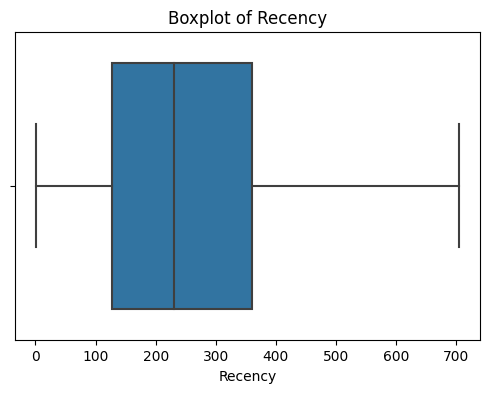

In [342]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Recency', data=RFM)
plt.title('Boxplot of Recency');

No outliers found

#Frequency

In [343]:
RFM['Frequency'].value_counts(normalize=True)*100

1     97.025333
2      2.395093
3      0.303099
4      0.108542
5      0.053247
6      0.035839
7      0.028671
8      0.010240
11     0.008192
12     0.008192
9      0.007168
10     0.003072
13     0.003072
19     0.002048
15     0.002048
14     0.002048
21     0.001024
26     0.001024
29     0.001024
22     0.001024
Name: Frequency, dtype: float64

I guess here we should select only frequency values that are greater than 5, because by doing this we only drop 0.11% of records

In [344]:
RFM['Frequency'].apply(lambda x: 'less or equal to 5' if x<=5 else 'greater than 5')\
                .value_counts(normalize=True) * 100

less or equal to 5    99.885314
greater than 5         0.114686
Name: Frequency, dtype: float64

#Monetary

In [345]:
RFM['Monetary'].describe([0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    97658.000000
mean       159.824647
std        218.553380
min          0.000000
25%         61.930000
50%        105.280000
75%        176.260000
90%        305.770000
95%        446.558000
99%       1048.665800
max      13664.080000
Name: Monetary, dtype: float64

Here, it seems like 95% percentile should be used to drop the outliers

**RFM groups**

I have used quantiles for assigning scores for Recency and Monetary.

groups are 0-33, 33-66, 66-100 quantiles
For Frequency I have decided to group them by hand

score=1 if the frequency value is 1
otherwise, the score will be 2

In [346]:
RFM['R_score'] = pd.qcut(RFM['Recency'], 3, labels=[1, 2, 3]).astype(str)
RFM['M_score'] = pd.qcut(RFM['Monetary'], 3, labels=[1, 2, 3]).astype(str)
RFM['F_score'] = RFM['Frequency'].apply(lambda x: '1' if x==1 else '2')

RFM['RFM_score'] = RFM['R_score'] + RFM['F_score'] + RFM['M_score']



1.  CORE - '123' - most recent, frequent, revenue generating - core customers that should be considered as most valuable clients
2.  GONE - '311', '312', '313' - gone, one-timers - those clients are probably gone;


3.   ROOKIE - '111', '112', '113' - just have joined - new clients that have joined recently
4.  WHALES - '323', '213', '223 - most revenue generating - whales that generate revenue









5.   LOYAL - '221', '222', '321', '322' - loyal users
6.  REGULAR - '121', '122', '211', '212', - average users - just regular customers that don't stand out





In [347]:
def segment(x):
    if x == '123':
        return 'Core'
    elif x in ['311', '312', '313']:
        return 'Gone'
    elif x in ['111', '112', '113']:
        return 'Rookies'
    elif x in ['323', '213', '223']:
        return 'Whales'
    elif x in ['221', '222', '321', '322']:
        return 'Loyal'
    else:
        return 'Regular'

In [348]:
RFM['segments'] = RFM['RFM_score'].apply(segment)
RFM['segments'].value_counts(normalize=True)*100

Rookies    32.633271
Gone       32.035266
Regular    22.179443
Whales     11.371316
Loyal       1.487845
Core        0.292859
Name: segments, dtype: float64

#Part 3: Natural Language Processing (NLP)
Objective: Develop a simple NLP model to classify customer reviews.


In [349]:
#importing libraries for NLP
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# NLTK tools for text processing
import re, nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

#matrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score



In [350]:
## Run the codes below to install language translator and have a view at the supported languages.
!pip install google_trans_new
import google_trans_new
print(google_trans_new.LANGUAGES)

{'af': 'afrikaans', 'sq': 'albanian', 'am': 'amharic', 'ar': 'arabic', 'hy': 'armenian', 'az': 'azerbaijani', 'eu': 'basque', 'be': 'belarusian', 'bn': 'bengali', 'bs': 'bosnian', 'bg': 'bulgarian', 'ca': 'catalan', 'ceb': 'cebuano', 'ny': 'chichewa', 'zh-cn': 'chinese (simplified)', 'zh-tw': 'chinese (traditional)', 'co': 'corsican', 'hr': 'croatian', 'cs': 'czech', 'da': 'danish', 'nl': 'dutch', 'en': 'english', 'eo': 'esperanto', 'et': 'estonian', 'tl': 'filipino', 'fi': 'finnish', 'fr': 'french', 'fy': 'frisian', 'gl': 'galician', 'ka': 'georgian', 'de': 'german', 'el': 'greek', 'gu': 'gujarati', 'ht': 'haitian creole', 'ha': 'hausa', 'haw': 'hawaiian', 'iw': 'hebrew', 'he': 'hebrew', 'hi': 'hindi', 'hmn': 'hmong', 'hu': 'hungarian', 'is': 'icelandic', 'ig': 'igbo', 'id': 'indonesian', 'ga': 'irish', 'it': 'italian', 'ja': 'japanese', 'jw': 'javanese', 'kn': 'kannada', 'kk': 'kazakh', 'km': 'khmer', 'ko': 'korean', 'ku': 'kurdish (kurmanji)', 'ky': 'kyrgyz', 'lo': 'lao', 'la': 'lat

In [351]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [352]:
# We have missing values in the reviews and their titles
reviews.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

To deal with these missing values, we would seperate the reviews and the titles and drop the missing rows seperately so that we don't have unequal shapes of rows.

In [353]:
review_data_title = reviews['review_comment_title']
review_data = reviews.drop(['review_comment_title'],axis=1)

In [354]:
# Dropping NaN values
review_data  = review_data.dropna()
review_data_title = review_data_title.dropna()

In [355]:
# Resetting the reviews index and visualizing the data
review_data = review_data.reset_index(drop=True)
review_data.head(3)
review_data.shape

(40977, 6)

In [356]:
review_data.head(3)

,review_id,order_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
1,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
2,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47


In [357]:
# Resetting the reviews titles index and visualizing the data
review_data_title = review_data_title.reset_index(drop=True)
review_data_title.head(3)
review_data_title.shape

(11568,)

In [358]:
 import nltk
 nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [359]:
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [360]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space,
    # which in effect deletes the punctuation marks
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [361]:
review_data['review_comment_message']=review_data['review_comment_message'].apply(remove_punctuation)
review_data.head()

,review_id,order_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Recebi bem antes do prazo estipulado,2017-04-21 00:00:00,2017-04-21 22:02:06
1,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
2,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,aparelho eficiente no site a marca do aparelho...,2018-05-22 00:00:00,2018-05-23 16:45:47
3,4b49719c8a200003f700d3d986ea1a19,9d6f15f95d01e79bd1349cc208361f09,4,Mas um pouco travandopelo valor ta Boa\r\n,2018-02-16 00:00:00,2018-02-20 10:52:22
4,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,Vendedor confiável produto ok e entrega antes ...,2018-05-23 00:00:00,2018-05-24 03:00:01


In [362]:
# Examples of some portuguese stopwords
pt_stopwords = stopwords.words('portuguese')
print(f'Total portuguese stopwords in the nltk.corpous module: {len(pt_stopwords)}')
pt_stopwords[:10]

Total portuguese stopwords in the nltk.corpous module: 207


['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as']

In [363]:
# extracting the stopwords from nltk library
sw = nltk.corpus.stopwords.words('portuguese')
# displaying the stopwords
for i in sw:
  print(i , end=',  ')

a,  à,  ao,  aos,  aquela,  aquelas,  aquele,  aqueles,  aquilo,  as,  às,  até,  com,  como,  da,  das,  de,  dela,  delas,  dele,  deles,  depois,  do,  dos,  e,  é,  ela,  elas,  ele,  eles,  em,  entre,  era,  eram,  éramos,  essa,  essas,  esse,  esses,  esta,  está,  estamos,  estão,  estar,  estas,  estava,  estavam,  estávamos,  este,  esteja,  estejam,  estejamos,  estes,  esteve,  estive,  estivemos,  estiver,  estivera,  estiveram,  estivéramos,  estiverem,  estivermos,  estivesse,  estivessem,  estivéssemos,  estou,  eu,  foi,  fomos,  for,  fora,  foram,  fôramos,  forem,  formos,  fosse,  fossem,  fôssemos,  fui,  há,  haja,  hajam,  hajamos,  hão,  havemos,  haver,  hei,  houve,  houvemos,  houver,  houvera,  houverá,  houveram,  houvéramos,  houverão,  houverei,  houverem,  houveremos,  houveria,  houveriam,  houveríamos,  houvermos,  houvesse,  houvessem,  houvéssemos,  isso,  isto,  já,  lhe,  lhes,  mais,  mas,  me,  mesmo,  meu,  meus,  minha,  minhas,  muito,  na, 

In [364]:
def remove_stopwords(text):
  ''' a for removing the stopwords'''
  #Method 1
  text1 = [word.lower() for word in text.split() if word.lower() not in sw]
  return " ".join(text1)

In [365]:
review_data['review_comment_message']=review_data['review_comment_message'].apply(remove_stopwords)
review_data.head()

,review_id,order_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,recebi bem antes prazo estipulado,2017-04-21 00:00:00,2017-04-21 22:02:06
1,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,parabéns lojas lannister adorei comprar intern...,2018-03-01 00:00:00,2018-03-02 10:26:53
2,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,aparelho eficiente site marca aparelho impress...,2018-05-22 00:00:00,2018-05-23 16:45:47
3,4b49719c8a200003f700d3d986ea1a19,9d6f15f95d01e79bd1349cc208361f09,4,pouco travandopelo valor ta boa,2018-02-16 00:00:00,2018-02-20 10:52:22
4,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,vendedor confiável produto ok entrega antes prazo,2018-05-23 00:00:00,2018-05-24 03:00:01


Using CountVectorizer() to count vocabulary items

In [366]:
# Create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(review_data['review_comment_message'])
# Collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [367]:
dictionary

dict_items([('recebi', 15495), ('bem', 3168), ('antes', 2228), ('prazo', 14143), ('estipulado', 8114), ('parabéns', 13150), ('lojas', 11173), ('lannister', 10762), ('adorei', 1599), ('comprar', 4778), ('internet', 10389), ('seguro', 16673), ('prático', 14900), ('todos', 17679), ('feliz', 8727), ('páscoa', 14983), ('aparelho', 2322), ('eficiente', 7005), ('site', 16943), ('marca', 11507), ('impresso', 9998), ('3desinfector', 986), ('chegar', 4216), ('outro', 13011), ('nomeatualizar', 12475), ('correta', 5415), ('vez', 18528), ('pouco', 14070), ('travandopelo', 17907), ('valor', 18282), ('ta', 17337), ('boa', 3268), ('vendedor', 18420), ('confiável', 5037), ('produto', 14609), ('ok', 12764), ('entrega', 7498), ('gostaria', 9499), ('saber', 16425), ('sempre', 16714), ('compra', 4732), ('agora', 1726), ('decpcionou', 5839), ('péssimo', 14994), ('loja', 11141), ('nota', 12506), ('10', 196), ('obrigado', 12658), ('atençao', 2708), ('amim', 2108), ('dispensada', 6657), ('realizada', 15427), (

In [368]:
vocab = [ ]
count_of_vocab = []
for key , value in dictionary:
  vocab.append( key )
  count_of_vocab.append( value )

In [369]:
#store the count in pandas dataframe with vocab as index
vocab_before_stemming = pd.DataFrame({"Words":vocab,
                                     "count":count_of_vocab})
#store the dataframe
vocab_before_stemming =  vocab_before_stemming.sort_values("count" ,ascending=False)


In [370]:
vocab_before_stemming.head(4)

,Words,count
17218,ünica,18964
15751,útilbem,18963
4000,útil,18962
12106,úteisesperei,18961


In [371]:
# Create an object of stemming function
stemmer = SnowballStemmer("portuguese")
def Apply_stemming(text):
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)


In [372]:
review_data['review_comment_message']=review_data['review_comment_message'].apply(Apply_stemming)
review_data.head()

,review_id,order_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,receb bem antes praz estipul,2017-04-21 00:00:00,2017-04-21 22:02:06
1,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,parabéns loj lannist ador compr internet segur...,2018-03-01 00:00:00,2018-03-02 10:26:53
2,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,aparelh eficient sit marc aparelh impress 3des...,2018-05-22 00:00:00,2018-05-23 16:45:47
3,4b49719c8a200003f700d3d986ea1a19,9d6f15f95d01e79bd1349cc208361f09,4,pouc travandopel valor ta boa,2018-02-16 00:00:00,2018-02-20 10:52:22
4,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,vendedor confiável produt ok entreg antes praz,2018-05-23 00:00:00,2018-05-24 03:00:01


In [373]:
# Create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()

# Fit the vectorizer using the text data
tfid_vectorizer.fit(review_data['review_comment_message'])

# Collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

In [374]:
# Lists to store the vocab and counts
vocab = []
count_of_vocab = []
# Iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count_of_vocab.append(value)

In [375]:

# Store the count in panadas dataframe with vocab as index
vocab_after_stemming = pd.DataFrame({"Word": vocab ,
                                      "count" :count_of_vocab})
# Sort the dataframe
vocab_after_stemming = vocab_after_stemming.sort_values("count" ,ascending=False)

In [376]:
top15_most_ocurred_vocab = vocab_after_stemming.head(15)

In [377]:
top15_most_occurred_words_count = top15_most_ocurred_vocab['count'].values
top15_most_occurred_words_count

array([12765, 12764, 12763, 12762, 12761, 12760, 12759, 12758, 12757,
       12756, 12755, 12754, 12753, 12752, 12751])

In [378]:
# Store the count in panadas dataframe with vocab as index
vocab_after_stemming = pd.DataFrame({"Word": vocab ,
                                      "count" :count_of_vocab})
# Sort the dataframe
vocab_after_stemming = vocab_after_stemming.sort_values("count" ,ascending=False)

In [379]:
top15_most_occurred_words = top15_most_ocurred_vocab.Word.values
top15_most_occurred_words

array(['ünic', 'útilb', 'útil', 'úteisesp', 'úte', 'únic', 'úmid',
       'últim', 'ötim', 'ônus', 'ônibus', 'ômeg', 'óóótim', 'ótom',
       'ótmo'], dtype=object)

In [380]:
top15_most_occurred_words_count = top15_most_ocurred_vocab['count'].values
top15_most_occurred_words_count

array([12765, 12764, 12763, 12762, 12761, 12760, 12759, 12758, 12757,
       12756, 12755, 12754, 12753, 12752, 12751])

***Conclusion***

Analyzing each of the variables we were able to obtain important insights about the Olist website's customers:



*  We separated the worst sellers in terms of delivery, so we can create a strategy to work around the situation.

*  We could forecast revenue for the coming weeks, supporting the team that will set the goals.
*   We understood seasonal trends that affect revenue.


*   We observed where our active customers are, geographically.


*   We found out monthly retention rate of customer, revenue generated per month and also revenvue created by the customer per month





*  We analyzed which product categories obtain the best performances in evaluations and sales quantity.
*   We found out which states have the most expensive freight, which have the most sales, which have the largest purchases and the revenue for each.


*  We analyzed what percentage of customers are Loyal,Regural and gone


*   We build a Regression model to predict the total purchase price by the customer in a week such as Linear regression , Xgboost regression and Random Forest gression with Evaluation matrix
*  In text analysis (NLP) I used stop words, removed punctuations , stemming & TF-IDF vectorizer and other functions of NLP






